In [1]:
# Step 1: Import necessary libraries

In [2]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import StratifiedShuffleSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Step 2: Define dataset path and check contents

In [4]:
# Define dataset path
dataset_path = r"C:\Users\Acer\Downloads\Python\Deep Learning\CNN\Brain Tumor"

# Define training and testing paths
training_path = os.path.join(dataset_path, 'Training')
testing_path = os.path.join(dataset_path, 'Testing')

# Define categories based on training data folders
categories = os.listdir(training_path)
print(f"Categories: {categories}")

Categories: ['glioma', 'meningioma', 'notumor', 'pituitary']


In [5]:
# Step 3: Define categories and their descriptions

In [6]:
# Define categories based on training data folders
categories = os.listdir(training_path)
print(f"Categories: {categories}")

# Category descriptions
category_descriptions = {
    "pituitary": "A pituitary tumor is an abnormal growth in the pituitary gland, located at the base of the brain.",
    "notumor": "No Tumor.",
    "meningioma": "A meningioma arises from the meninges, protecting the brain and spinal cord.",
    "glioma": "Gliomas originate in the glial cells of the brain or spinal cord."
}


Categories: ['glioma', 'meningioma', 'notumor', 'pituitary']


In [7]:
# Step 4: Load and preprocess images

In [8]:
# Load and preprocess image data
def load_data(dataset_path, categories):
    images, labels = [], []
    for category in categories:
        category_path = os.path.join(dataset_path, category)
        for img in os.listdir(category_path):
            img_path = os.path.join(category_path, img)
            try:
                img_array = image.load_img(img_path, target_size=(128, 128))
                img_array = image.img_to_array(img_array) / 255.0  # normalize
                images.append(img_array)
                labels.append(categories.index(category))
            except Exception as e:
                print(f"Error loading {img_path}: {e}")
    return np.array(images), np.array(labels)

# Example usage
training_path = r"C:\Users\Acer\Downloads\Python\Deep Learning\CNN\Brain Tumor\Training"
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']

X, y = load_data(training_path, categories)
print(f"Total images: {X.shape}, Labels: {y.shape}")

Total images: (5712, 128, 128, 3), Labels: (5712,)


In [9]:
# Step 5: Split dataset into training and validation sets

In [10]:
# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Step 6: Data augmentation for better performance

In [12]:
# Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator()

In [13]:
# Step 7: Build an improved CNN model with Batch Normalization

In [14]:
# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])

In [15]:
# Step 8: Compile the model with Adam optimizer

In [16]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
# Early stopping & checkpoint
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_model.keras", save_best_only=True)

In [18]:
# Step 9: Train the model and improve accuracy


In [19]:
# Train model
history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=32),
    validation_data=val_datagen.flow(X_val, y_val),
    epochs=30,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

Epoch 1/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 79s 504ms/step - accuracy: 0.4963 - loss: 1.6632 - val_accuracy: 0.2528 - val_loss: 3.7634
Epoch 2/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 70s 485ms/step - accuracy: 0.5981 - loss: 0.9581 - val_accuracy: 0.3736 - val_loss: 2.1345
Epoch 3/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 73s 510ms/step - accuracy: 0.6650 - loss: 0.8459 - val_accuracy: 0.4462 - val_loss: 1.7486
Epoch 4/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 66s 459ms/step - accuracy: 0.6654 - loss: 0.8521 - val_accuracy: 0.6929 - val_loss: 0.7463
Epoch 5/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 75s 519ms/step - accuracy: 0.6778 - loss: 0.7891 - val_accuracy: 0.7288 - val_loss: 0.7126
Epoch 6/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 71s 489ms/step - accuracy: 0.6962 - loss: 0.7491 - val_accuracy: 0.7813 - val_loss: 0.5812
Epoch 7/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 70s 486ms/step - accuracy: 0.7203 - loss: 0.7012 - val_accuracy: 0.7454 - val_loss: 0.7090
Epoch 8/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 70s 486ms/step - accuracy: 0.7457 - loss: 0

In [20]:
# Step 10: Evaluate model performance

In [21]:
# Evaluate model
loss, accuracy = model.evaluate(val_datagen.flow(X_val, y_val))
print(f"Validation Accuracy: {accuracy*100:.2f}%, Loss: {loss:.4f}")


36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 179ms/step - accuracy: 0.8195 - loss: 0.5157
Validation Accuracy: 81.45%, Loss: 0.5231


In [22]:
# Step 11: Plot training and validation accuracy/loss

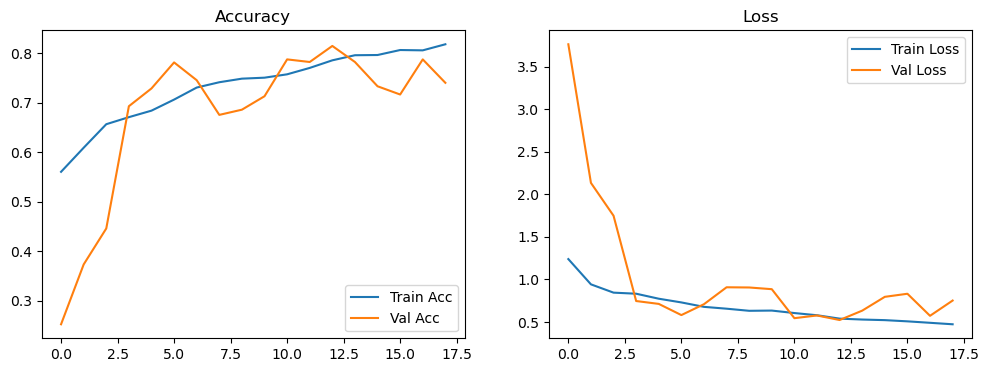

In [23]:
# 📈 Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()

In [24]:
# Step 12: Plot actual vs predicted values graph

36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step


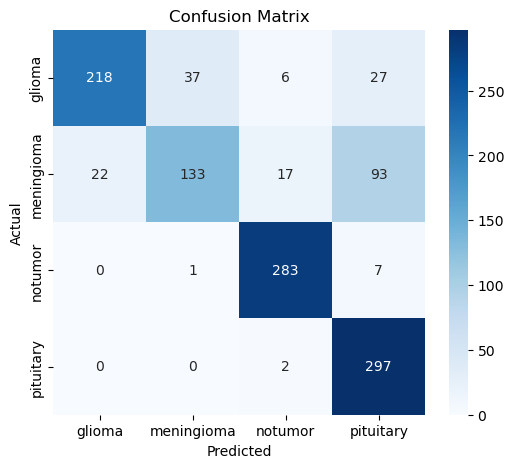

In [25]:
# 🔍 Confusion Matrix
y_pred = np.argmax(model.predict(X_val), axis=1)
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=categories, yticklabels=categories, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

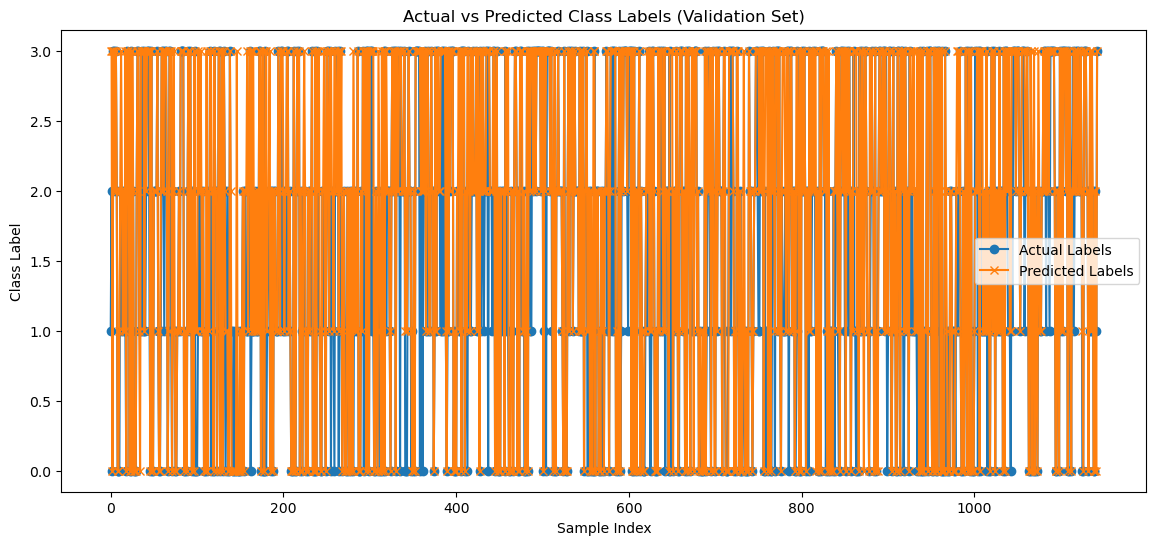

In [26]:
plt.figure(figsize=(14, 6))

# Plot actual values
plt.plot(y_val, label='Actual Labels', marker='o')

# Plot predicted values
plt.plot(y_pred, label='Predicted Labels', marker='x')

plt.title("Actual vs Predicted Class Labels (Validation Set)")
plt.xlabel("Sample Index")
plt.ylabel("Class Label")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
✅ Predicted: pituitary
📄 Description: A pituitary tumor is an abnormal growth in the pituitary gland, located at the base of the brain.


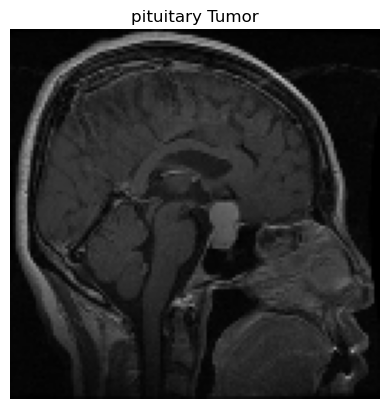

In [57]:
# 📷 Prediction function
def predict_image(image_path):
    if not os.path.exists(image_path):
        print("❌ File not found.")
        return
    img = image.load_img(image_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    class_name = categories[class_index]
    description = category_descriptions[class_name]
    print(f"✅ Predicted: {class_name}\n📄 Description: {description}")
    plt.imshow(img)
    plt.title(f"{class_name} Tumor")
    plt.axis('off')
    plt.show()
# 📸 Test with sample image
test_image_path = r"C:\Users\Acer\Downloads\Python\Deep Learning\CNN\Brain Tumor\Testing\random\pitu1.jpg"
predict_image(test_image_path)

In [61]:
# ✔ Save as .h5 for deployment
model.save("brain_tumor_classifier.keras")
print(" Model saved as brain_tumor_classifier.keras")

 Model saved as brain_tumor_classifier.keras
